In [ ]:
import numpy as np
import math
import h5py
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Read Data

In [ ]:
# Load training and testing data
file = h5py.File("/content/drive/MyDrive/Colab Notebooks/Building Datasets/dataset.h5", "r+")
X_train = np.array(file["/X_train"]).astype("uint8")
X_test = np.array(file["/X_test"]).astype("uint8")
y_train = np.array(file["/y_train"]).astype("uint8")
y_test = np.array(file["/y_test"]).astype("uint8")

In [ ]:
print("Shape of training set: {}".format(X_train.shape))
print("Shape of training label: {}".format(y_train.shape))
print("Shape of testing set: {}".format(X_test.shape))
print("Shape of testing label: {}".format(y_test.shape))

Shape of training set: (27, 12288)
Shape of training label: (27,)
Shape of testing set: (7, 12288)
Shape of testing label: (7,)


In [ ]:
def image_grid(D, H, W, cols=10, scale=1):
  """display a grid of images
      H,W: Height and width of the images
      cols: number of columns = number of images in each row
      scale: 1 to fill screen
  """
  n = np.shape(D)[0]
  rows = int(math.ceil((n+0.0)/cols))
  fig =plt.figure(1, figsize=[scale*20.0/ H*W, scale*20.0/cols*rows], dpi=300)
  for i in range(n):
    plt.subplot(rows,cols, i + 1)
    fig = plt.imshow(np.reshape(D[i,:],[H,W]), cmap = plt.get_cmap("gray"))
    plt.axis('off')

In [ ]:
H = 64
W = 192

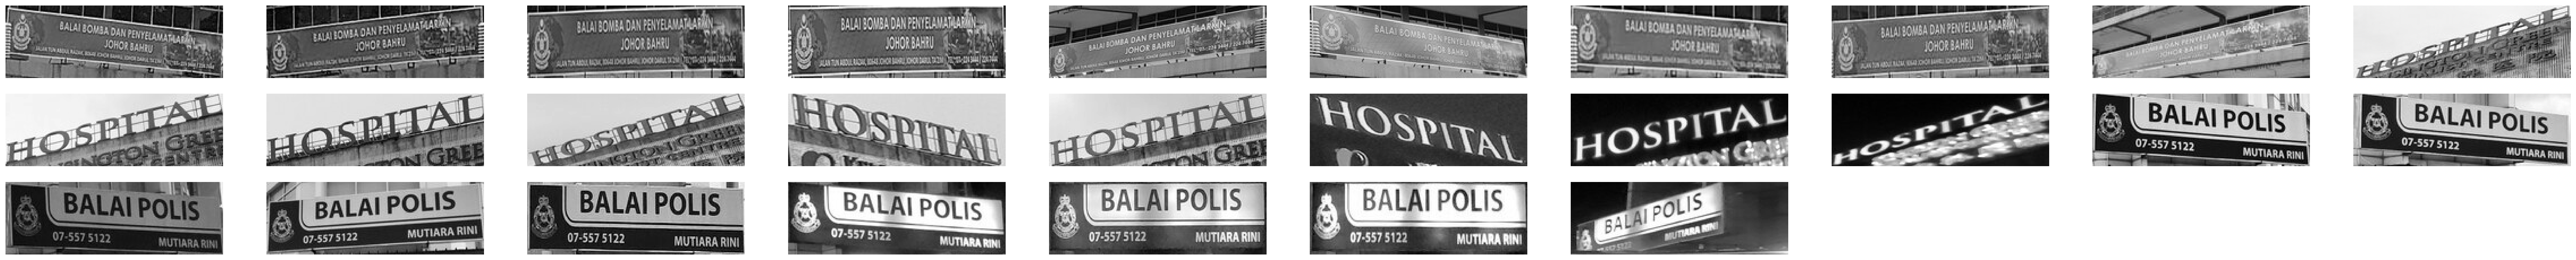

In [ ]:
# Show the training images
image_grid(X_train, H, W)
plt.show()

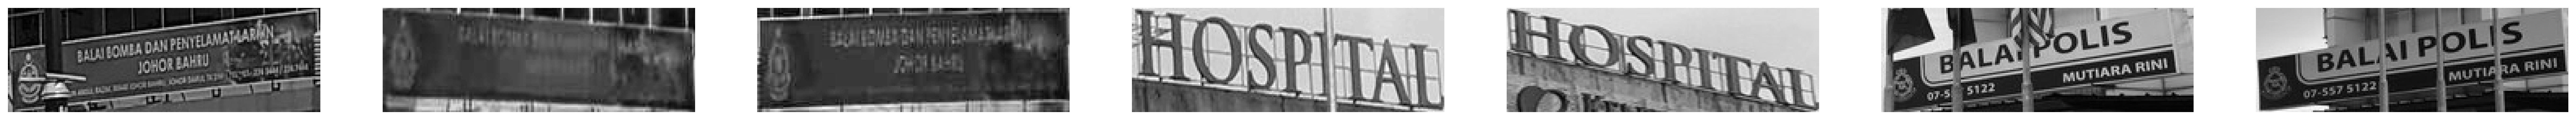

In [ ]:
# Show the testing images
image_grid(X_test, H, W)
plt.show()

#Data Preprocessing

**PCA**

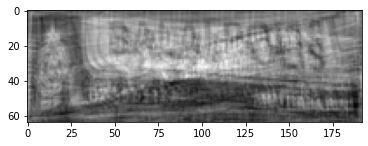

In [ ]:
# Find the mean image
mean_image = np.mean(X_train,axis=0)

plt.imshow(np.reshape(mean_image, [H,W]), cmap=plt.get_cmap("gray"))
plt.show()

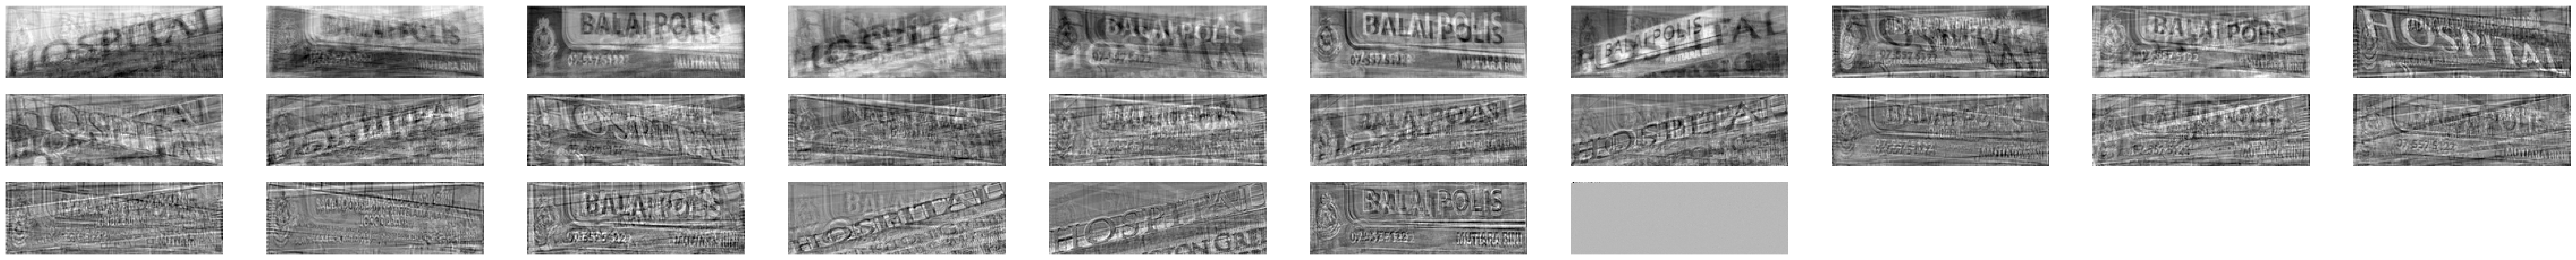

In [ ]:
from sklearn.decomposition import PCA
n_components = 27

# Extracting the top 27 eigenfaces from the dataset
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

# Showing the eigenfaces
eigenfaces = pca.components_
image_grid(eigenfaces[:,:], H, W)
plt.show()

eigenfaces = eigenfaces.reshape((n_components, H, W))

In [ ]:
# Projecting the input data on the eigenfaces orthonormal basis
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

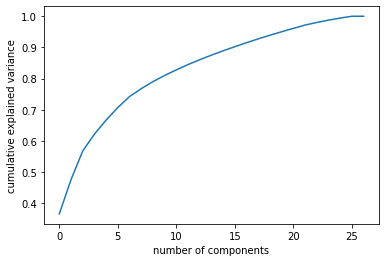

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [ ]:
# Calculate distances

intra_class_dist = np.sum(np.power((X_train_pca[0,:] - X_test_pca[0,:]),2))
inter_class_dist = np.sum(np.power((X_train_pca[0,:] - X_test_pca[6,:]),2))
print("Intra-class distance: %d" % (intra_class_dist))
print("Inter-class distance: %d" % (inter_class_dist))


Intra-class distance: 275462586300090468102190399488
Inter-class distance: 578224675780091490857734111232


In [ ]:
print("Shape of training set: {}".format(X_train_pca.shape))
print("Shape of testing set: {}".format(X_test_pca.shape))

Shape of training set: (27, 27)
Shape of testing set: (7, 27)


**LDA**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
lda = LinearDiscriminantAnalysis(n_components=2)

lda.fit(X_train, y_train)
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

In [ ]:
print("Shape of training set: {}".format(X_train_lda.shape))
print("Shape of testing set: {}".format(X_test_lda.shape))

Shape of training set: (27, 2)
Shape of testing set: (7, 2)


In [ ]:
# Calculate distances
intra_class_dist = np.sum(np.power((X_train_lda[0,:] - X_test_lda[0,:]),2))
inter_class_dist = np.sum(np.power((X_train_lda[0,:] - X_test_lda[4,:]),2))
print("Intra-class distance: %f" % (intra_class_dist))
print("Inter-class distance: %f" % (inter_class_dist))

Intra-class distance: 1.302508
Inter-class distance: 5.293088


#Train Model Using SVM

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC(kernel='linear', C = 3)

# Fit the preprocessed data with lda to the model
clf.fit(X_train_lda, y_train)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Evaluation

In [ ]:
clf.score(X_test_lda, y_test)

1.0

In [ ]:
y_predict = clf.predict(X_test_lda)
print("Actual:    {}". format(y_test))
print("Predicted: {}". format(y_predict))

Actual:    [1 1 1 2 2 3 3]
Predicted: [1 1 1 2 2 3 3]


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)

**Visualize Confusion Matrix using Heatmap**

Text(0.5, 257.44, 'Predicted label')

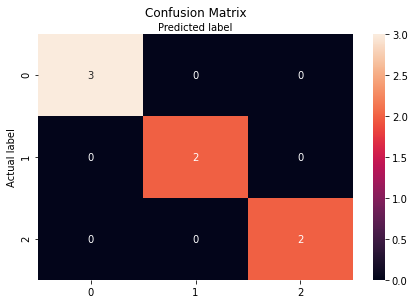

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

class_names = [1,2,3] 

fig, ax = plt.subplots()
plt.xticks(class_names)
plt.yticks(class_names)

sns.heatmap(cm, annot=True, fmt='d') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Confusion Matrix Evaluation Metrics**

In [ ]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_predict))
print("Precision:", metrics.precision_score(y_test, y_predict, average='micro'))
print("Recall:", metrics.recall_score(y_test, y_predict, average='micro'))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print("Classification Report: \n", classification_report(y_test, y_predict))

Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



#Save Model

In [ ]:
import pickle

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Building Datasets/building_svm', 'wb') as f:
  pickle.dump(clf, f)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Building Datasets/building_svm', 'rb') as f:
  new = pickle.load(f)

In [ ]:
new.predict([X_test_lda[1]])

array([1], dtype=uint8)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Building Datasets/building_lda', 'wb') as a:
  pickle.dump(lda, a)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Building Datasets/building_lda', 'rb') as a:
  new2 = pickle.load(a)

In [ ]:
new2.transform([X_test[0]])

array([[0.09623238, 1.01645998]])